In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob

### 1. Cross-Validation

In [2]:
report_files = glob.glob('report_files/cross_validation_report_*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

# Load the data from the selected file
with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_fine_08191617.json


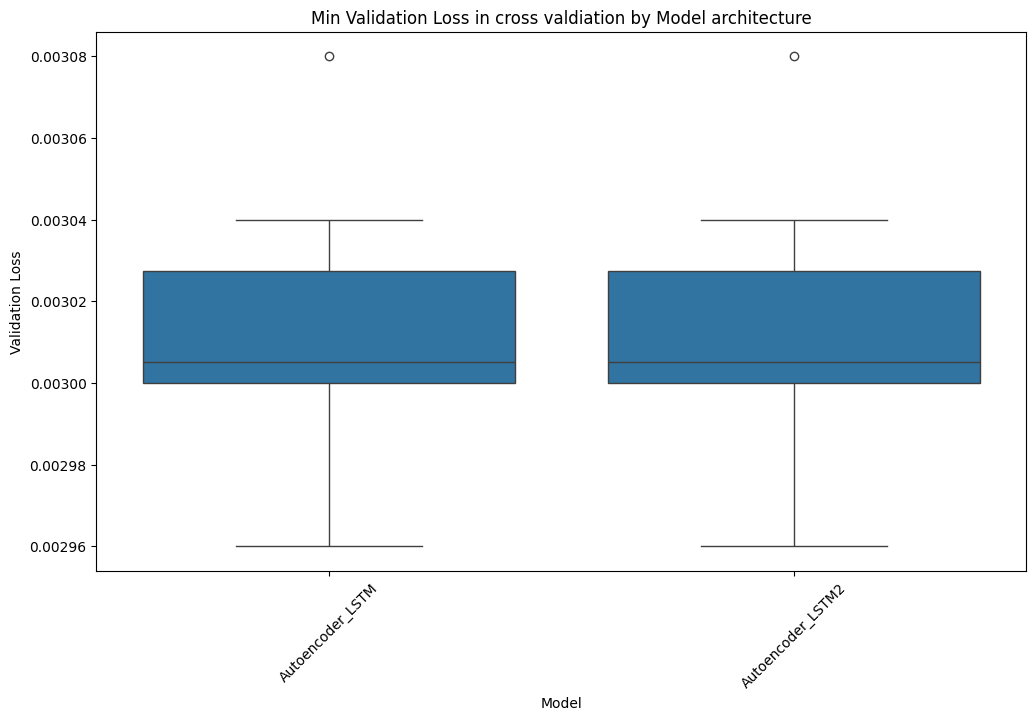

In [3]:
df = pd.DataFrame([
    {'model': model, 'val_loss': loss, 'mean_val_loss': details['mean_val_loss']}
    for model, details in data.items()
    for loss in details['val_losses']
])

# Sort by mean_val_loss
df_sorted = df.sort_values('mean_val_loss')

# Convert 'model' to a categorical variable to ensure it is treated correctly
df_sorted['model'] = pd.Categorical(df_sorted['model'], ordered=True, categories=df_sorted['model'].unique())

plt.figure(figsize=(12, 7))
sns.boxplot(x='model', y='val_loss', data=df_sorted)

plt.title('Min Validation Loss in cross valdiation by Model architecture')
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Initialize an empty list to store the data for the DataFrame
table_data = []

# Iterate over each entry in the JSON to parse and format it for the DataFrame
for i, (key, value) in enumerate(data.items(), start=1):
    # Extract the architecture and optimiser_params from the key
    architecture_str, optimiser_params_str = key.split('], optimiser_params=')
    architecture_str = architecture_str.replace('architecture=', '')
    optimiser_params_str = optimiser_params_str.strip('{}')
    
    # Convert the optimiser_params string to a dictionary
    optimiser_params = eval("{" + optimiser_params_str + "}")
    
    # Prepare the row data
    row = {
        'combination_id': i,
        'layer_configuration': architecture_str,
        'optimiser': optimiser_params['optimiser'],
        'learning_rate': optimiser_params['learning_rate'],
        'batch_size': optimiser_params['batch_size'],
        'scheduler_params': optimiser_params['scheduler_params'],
        'weight_decay': optimiser_params['weight_decay'],
        'mean_val_loss': value['mean_val_loss'],
        'stdv_val_loss': value['stdv_val_loss']
    }
    
    # Add the row to the table data
    table_data.append(row)

# Create a DataFrame
df = pd.DataFrame(table_data)

# Sort the DataFrame by mean_val_loss
df_sorted = df.sort_values(by='mean_val_loss')

# Display the entire DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.max_rows', None)     # Ensure all rows are displayed

# Display the sorted DataFrame
df_sorted

,combination_id,layer_configuration,optimiser,learning_rate,batch_size,scheduler_params,weight_decay,mean_val_loss,stdv_val_loss
1,2,"[{'type': 'bidirectional_lstm', 'units': 19, '...",adadelta,1.0,64,None,0.0001,0.003228,0.000059
0,1,"[{'type': 'bidirectional_lstm', 'units': 20, '...",adadelta,1.0,64,None,0.0001,0.003239,0.000077


### 2. Final Model Trainining

In [ ]:
report_files = glob.glob('report_files/final_training_report_*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

# Load the data from the selected file
with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

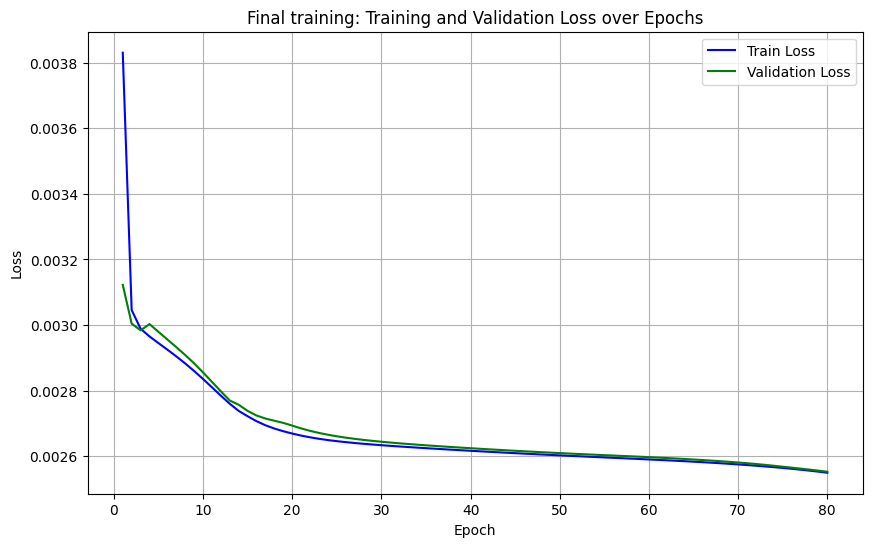

In [18]:
train_losses = data['train_losses']
val_losses = data['val_losses']
epochs = list(range(1, len(train_losses) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, linestyle='-', color='green', label='Validation Loss')
plt.title("Final training: Training and Validation Loss over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()